In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from math import sqrt
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp

music = pd.read_csv('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\music.csv')

In [2]:
pd.options.display.max_columns = None
music.head()

,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,location,longitude,loudness,mode,mode_confidence,release.id,release.name,similar,song.hotttnesss,song.id,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,0.736,37.157357,California - LA,-63.933358,-11.197,0,0.636,300848,Fear Itself,ARV4KO21187FB38008,0.602120,SOMZWCG12A8C13C480,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,0.169,35.149680,"Memphis, TN",-90.048920,-9.843,0,0.430,300822,Dimensions,ARSZWK21187B9B26D7,NaN,SOCIWDW12A8C13D406,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,0.643,37.157357,Not available,-63.933358,-9.689,1,0.565,514953,Las Numero 1 De La Sonora Santanera,ARFSJUG11C8A421AAD,NaN,SOXVLOJ12AB0189215,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,0.751,37.157357,"London, England",-63.933358,-9.013,1,0.749,287650,Friend Or Foe,AR4R0741187FB39AF2,NaN,SONHOTT12A8C13493C,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,0.092,37.157357,Not available,-63.933358,-4.501,1,0.371,611336,Muertos Vivos,ARUA62A1187B99D9B0,0.604501,SOFSOCN12A8C143F5D,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


In [3]:
music = music.drop(['artist_mbtags'], axis=1)

In [4]:
# this will take care of all the int or float columns
music = music.fillna(music.mean()) 

# This takes care of the Nan in 'artist_mbtags'
music['similar'] = music['similar'].fillna(music['similar'].mode()[0])
music['terms'] = music['terms'].fillna(music['terms'].mode()[0])
music['title'] = music['title'].fillna(music['title'].mode()[0])

music.head()

,artist.hotttnesss,artist.id,artist.name,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,location,longitude,loudness,mode,mode_confidence,release.id,release.name,similar,song.hotttnesss,song.id,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,0.736,37.157357,California - LA,-63.933358,-11.197,0,0.636,300848,Fear Itself,ARV4KO21187FB38008,0.602120,SOMZWCG12A8C13C480,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,0.169,35.149680,"Memphis, TN",-90.048920,-9.843,0,0.430,300822,Dimensions,ARSZWK21187B9B26D7,0.342761,SOCIWDW12A8C13D406,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,0.643,37.157357,Not available,-63.933358,-9.689,1,0.565,514953,Las Numero 1 De La Sonora Santanera,ARFSJUG11C8A421AAD,0.342761,SOXVLOJ12AB0189215,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,0.751,37.157357,"London, England",-63.933358,-9.013,1,0.749,287650,Friend Or Foe,AR4R0741187FB39AF2,0.342761,SONHOTT12A8C13493C,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,0.092,37.157357,Not available,-63.933358,-4.501,1,0.371,611336,Muertos Vivos,ARUA62A1187B99D9B0,0.604501,SOFSOCN12A8C143F5D,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


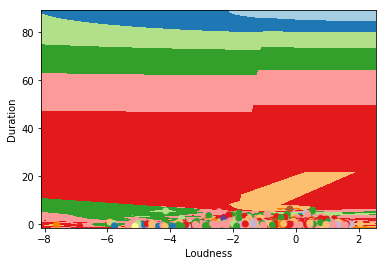

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
from sklearn.svm import SVR
from sklearn.svm import SVC

neighbors = KNeighborsRegressor(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})


# Fit our model.
#song_hotttnesss = music['song.hotttnesss']
Y = music.tempo
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

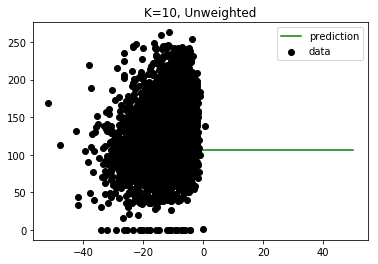

In [6]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.tempo
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

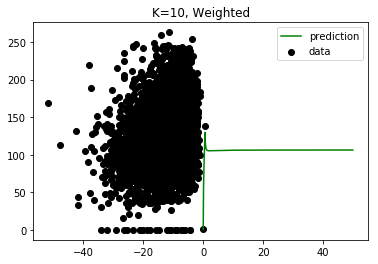

In [7]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.tempo
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.07 (+/- 0.03)
Weighted Accuracy: -0.41 (+/- 0.07)


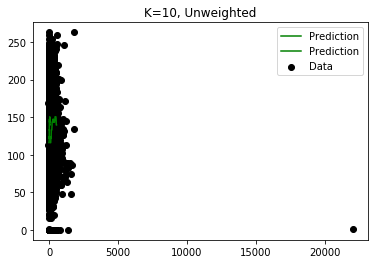

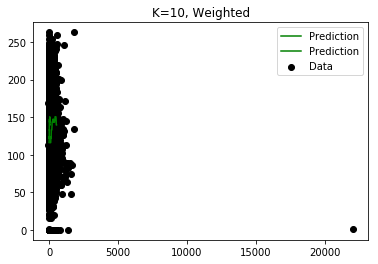

Unweighted Accuracy: -0.05 (+/- 0.05)
Weighted Accuracy: -0.08 (+/- 0.06)


In [9]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = np.array(music[['duration','loudness']])
Y = np.column_stack([music.tempo,music.tempo])
knn.fit(X, Y)

# Set up our prediction line.
T_x1 = np.arange(0, 60, 2)
T_x2 = np.arange(100, 550, 15)
T = np.column_stack([T_x1, T_x2])
# T = np.arange(0, 450, 15)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='Data')
plt.plot(T, Y_, c='g', label='Prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = np.array(music[['duration','loudness']])
knn_w.fit(X, Y)

# Set up our prediction line.
T_x1 = np.arange(0, 60, 2)
T_x2 = np.arange(100, 550, 15)
T = np.column_stack([T_x1, T_x2])

# Trailing underscores are a common convention for a prediction.
Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='Data')
plt.plot(T, Y_, c='g', label='Prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))